<a href="https://colab.research.google.com/github/ryan9453/0602/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train),(x_text, y_test))
load_data() # 觀察 發現data 在 tuple 裡
(x_train, y_train), (x_test, y_test) = load_data() # 確實抓到 目標data

In [65]:
# 觀察是否有抓到

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


0


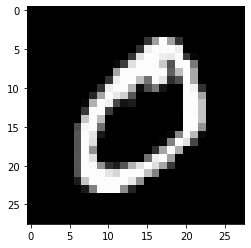

In [66]:
# 印出第一筆測試資料試試

import matplotlib.pyplot as plt
print(y_train[1])
plt.imshow(x_train[1], cmap = 'gray')

In [67]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128(線條) + 128(bias) = 100480
    Dense(256, activation = 'relu', input_dim = 784),
    # 128 * 10(線條) + 10(bias) = 1290
    Dense(10, activation = 'softmax')
]
model = Sequential(layers)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [69]:
# mse坡度在你預測很差的時候太小, cross entropy坡度好多了
# 二元(sigmoid): Binary Cross Entropy  p log (1/q) + (1-p) log (1/1-q)
# 多元(softmax): Categorical Cross Entropy  pi(1/qi)
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss = CategoricalCrossentropy(),
            optimizer = Adam(),
            metrics = ['accuracy'])


In [70]:
# 資料預處理
# 答案: [0, 5, 2, 3...]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test) 
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [71]:
# 圖片: [[255, 0, 255, 128]]
# 28 * 28 -> 784
x_train_norm = x_train.reshape(60000, 784)/255
x_test_norm = x_test.reshape(10000, 784)/255
# print(x_train_norm[0])

In [72]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 5400 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小，圖片小:200, 圖片大: 20)
# 200batch, 10epoch: 54000 * 10 / 200 -> (梯度調整)
# verbose: 0(無聲) 1(完整) 2(必要)
callbacks = [
    EarlyStopping(patience = 5, restore_best_weights = True),
    ModelCheckpoint('mlp.h5', save_best_only = True)
]

model.fit(x_train_norm, 
        y_train_cat,
        validation_split = 0.1,
        epochs = 100,
        verbose = 2,
        callbacks = callbacks,
        batch_size = 200)

Epoch 1/100
270/270 - 1s - loss: 0.3739 - accuracy: 0.8966 - val_loss: 0.1605 - val_accuracy: 0.9562
Epoch 2/100
270/270 - 1s - loss: 0.1640 - accuracy: 0.9531 - val_loss: 0.1126 - val_accuracy: 0.9697
Epoch 3/100
270/270 - 1s - loss: 0.1137 - accuracy: 0.9677 - val_loss: 0.0942 - val_accuracy: 0.9722
Epoch 4/100
270/270 - 1s - loss: 0.0854 - accuracy: 0.9751 - val_loss: 0.0861 - val_accuracy: 0.9740
Epoch 5/100
270/270 - 1s - loss: 0.0680 - accuracy: 0.9810 - val_loss: 0.0817 - val_accuracy: 0.9758
Epoch 6/100
270/270 - 0s - loss: 0.0537 - accuracy: 0.9852 - val_loss: 0.0747 - val_accuracy: 0.9788
Epoch 7/100
270/270 - 1s - loss: 0.0439 - accuracy: 0.9877 - val_loss: 0.0698 - val_accuracy: 0.9790
Epoch 8/100
270/270 - 1s - loss: 0.0354 - accuracy: 0.9902 - val_loss: 0.0693 - val_accuracy: 0.9792
Epoch 9/100
270/270 - 1s - loss: 0.0284 - accuracy: 0.9928 - val_loss: 0.0661 - val_accuracy: 0.9823
Epoch 10/100
270/270 - 1s - loss: 0.0241 - accuracy: 0.9939 - val_loss: 0.0698 - val_accura

In [73]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9807


[0.05923646688461304, 0.9807000160217285]

In [76]:
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在 tensorflow: 就帶 one-hot y_test_cat
# 不在 : 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
        columns = ['{}(預測)'.format(i) for i in range(10)],
        index = ['{}(正確)'.format(i) for i in range(10)] )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),971,0,1,0,0,2,3,1,2,0
1(正確),0,1126,3,1,0,0,2,0,3,0
2(正確),4,1,1010,1,1,0,2,5,8,0
3(正確),1,1,4,992,0,4,0,3,4,1
4(正確),0,1,3,1,965,0,2,1,1,8
5(正確),2,0,0,7,1,872,4,1,3,2
6(正確),5,3,1,0,5,8,934,1,1,0
7(正確),0,3,10,2,0,0,0,1006,3,4
8(正確),4,1,5,4,2,4,1,4,944,5
9(正確),3,3,0,4,5,1,0,4,2,987


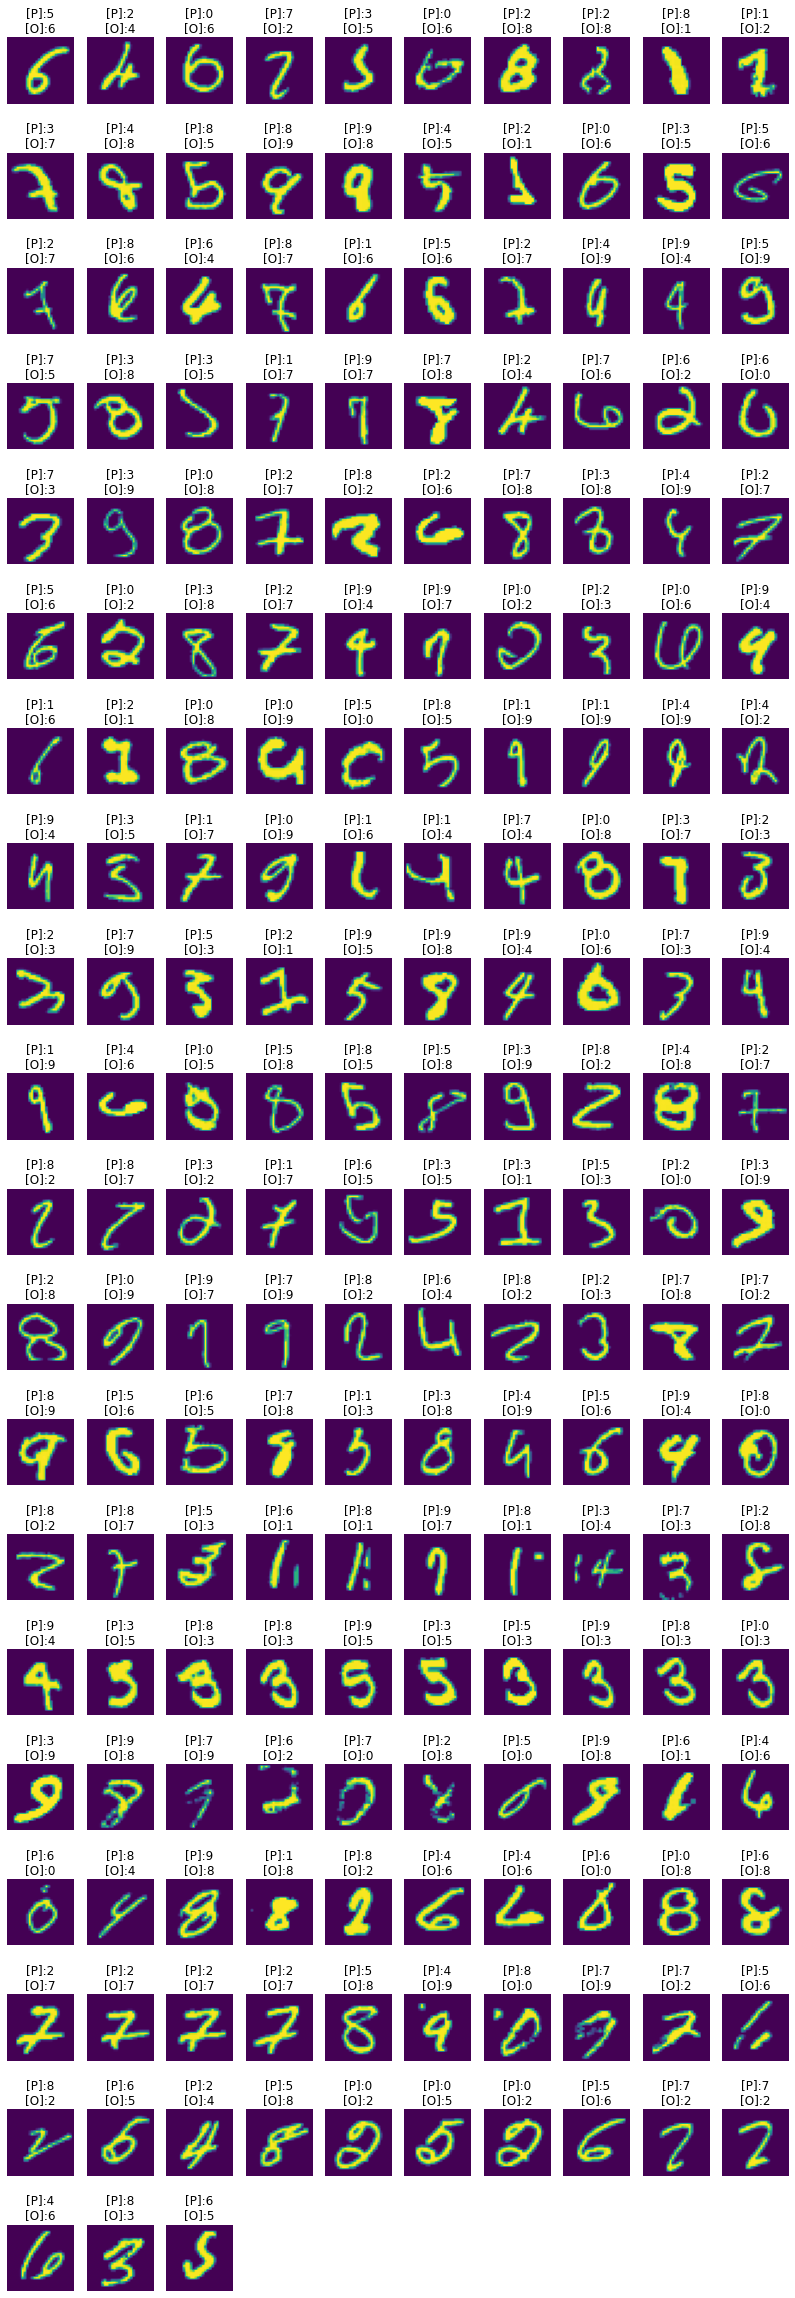

In [83]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
# np.nonzero([0, 2, 2])
false_pre = pre[idx]
false_label = y_test[idx]
false_img = x_test[idx]

plt.figure(figsize = (14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = '[P]:{}\n[O]:{}'.format(false_pre[i], false_label[i])
    plt.title(title)
    plt.axis('off')
    plt.imshow(false_img[i])

In [84]:
import os 
from tensorflow.keras.models import load_model
if not os.path.exists('mlp.h5'):
    layers = [
    # 784 * 128(線條) + 128(bias) = 100480
    Dense(256, activation = 'relu', input_dim = 784),
    # 128 * 10(線條) + 10(bias) = 1290
    Dense(10, activation = 'softmax')
    ]
    model = Sequential(layers)
    mode.compoile(loss = CategoricalCrossentropy(),
                optimizer = Adam(),
                mertrics = ['accuracy'])
else:
    # 手動儲存: model.save('mlp.h5)
    # 讀取完不用再 compile, 你可以直接進行預測(evaluate, predict)或者繼續訓練(fit)
    print('loading...')
    model = load_model('mlp.h5')
model.summary

loading...


<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f26acea8c50>>